# Finviz Finance

## Quote

In [1]:
import pandas as pd
from finvizfinance.quote import finvizfinance

stock = finvizfinance('tsla')

In [3]:
stock.ticker_charts()

'https://finviz.com/chart.ashx?t=tsla&ty=c&ta=1&p=d'

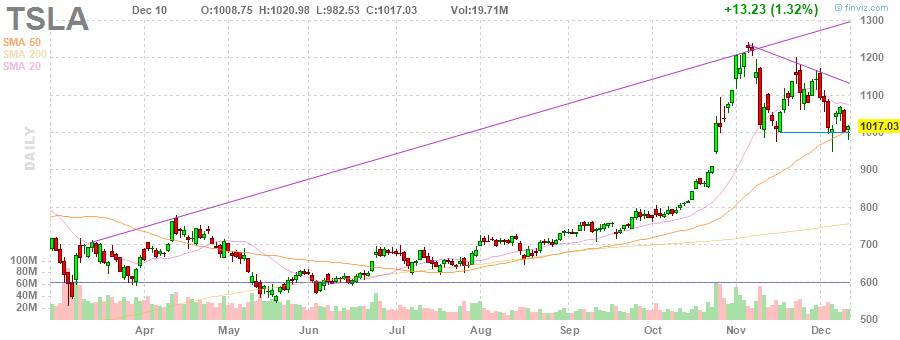

In [4]:
from IPython.display import Image
Image(filename='tsla.jpg')

In [5]:
stock_fundament = stock.ticker_fundament()
stock_description = stock.ticker_description()
outer_ratings_df = stock.ticker_outer_ratings()
news_df = stock.ticker_news()
inside_trader_df = stock.ticker_inside_trader()

In [6]:
print(stock_fundament)

{'Company': 'Tesla, Inc.', 'Sector': 'Consumer Cyclical', 'Industry': 'Auto Manufacturers', 'Country': 'USA', 'Index': 'S&P 500', 'P/E': '329.99', 'EPS (ttm)': '3.08', 'Insider Own': '0.20%', 'Shs Outstand': '963.33M', 'Perf Week': '0.20%', 'Market Cap': '979.74B', 'Forward P/E': '124.45', 'EPS next Y': '34.87%', 'Insider Trans': '-85.61%', 'Shs Float': '811.86M', 'Perf Month': '-4.77%', 'Income': '3.47B', 'PEG': '4.52', 'EPS next Q': '2.25', 'Inst Own': '42.50%', 'Short Float': '3.17%', 'Perf Quarter': '36.88%', 'Sales': '46.85B', 'P/S': '20.91', 'EPS this Y': '165.00%', 'Inst Trans': '4.67%', 'Short Ratio': '1.01', 'Perf Half Y': '64.65%', 'Book/sh': '27.11', 'P/B': '37.51', 'ROA': '6.40%', 'Target Price': '836.72', 'Perf Year': '62.19%', 'Cash/sh': '16.71', 'P/C': '60.87', 'EPS next 5Y': '73.06%', 'ROE': '14.30%', '52W Range From': '539.49', '52W Range To': '1243.49', 'Perf YTD': '44.12%', 'Dividend': '-', 'P/FCF': '99.06', 'EPS past 5Y': '19.70%', 'ROI': '5.00%', '52W High': '-18.2

In [7]:
print(stock_description)

Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warranties and extended service plans. The Energy Generation and Storage segment engage

In [8]:
outer_ratings_df.head()

,Date,Status,Outer,Rating,Price
0,2021-12-07,Reiterated,UBS,Neutral,$725 → $1000
1,2021-11-08,Reiterated,Jefferies,Buy,$950 → $1400
2,2021-10-25,Reiterated,Morgan Stanley,Overweight,$900 → $1200
3,2021-10-21,Reiterated,Wells Fargo,Equal Weight,$660 → $860
4,2021-10-21,Reiterated,Wedbush,Outperform,$1000 → $1100


In [9]:
news_df.head()

,Date,Title,Link
0,2021-12-11 18:36:00,Dow Jones Futures: Bulls Still Penned In With ...,https://www.investors.com/market-trend/stock-m...
1,2021-12-11 15:17:00,Is Lucid Motors a Buy Right Now?,https://www.fool.com/investing/2021/12/11/is-l...
2,2021-12-11 13:43:00,Jim Cramer likes these 3 'junior' growth stock...,https://finance.yahoo.com/news/jim-cramer-like...
3,2021-12-11 10:33:00,Want to Bet on China's EV Growth? Here Are 6 S...,https://www.fool.com/investing/2021/12/11/want...
4,2021-12-11 09:00:00,Dorsey's exit from Twitter reveals shortening ...,https://finance.yahoo.com/news/twitter-salesfo...


In [10]:
inside_trader_df.head()

,Insider Trading,Relationship,Date,Transaction,Cost,#Shares,Value ($),#Shares Total,SEC Form 4,SEC Form 4 Link,Insider_id
0,Musk Elon,CEO,Dec 09,Option Exercise,6.24,2165241.0,13511104.0,2165241.0,Dec 09 08:19 PM,http://www.sec.gov/Archives/edgar/data/1318605...,1494730
1,Musk Elon,CEO,Dec 09,Sale,1044.54,390639.0,408039939.0,1231150.0,Dec 09 08:21 PM,http://www.sec.gov/Archives/edgar/data/1318605...,1494730
2,Musk Elon,CEO,Dec 09,Sale,1021.56,543452.0,555171415.0,1621789.0,Dec 09 08:19 PM,http://www.sec.gov/Archives/edgar/data/1318605...,1494730
3,Taneja Vaibhav,Chief Accounting Officer,Dec 06,Sale,980.41,1590.0,1559339.0,22905.0,Dec 07 09:11 PM,http://www.sec.gov/Archives/edgar/data/1318605...,1771340
4,Kirkhorn Zachary,Chief Financial Officer,Dec 06,Sale,980.43,2652.0,2600345.0,56634.0,Dec 07 09:02 PM,http://www.sec.gov/Archives/edgar/data/1318605...,1771364


In [11]:
stock.ticker_signal()

['Most Active', 'Major News']

## Statements

In [17]:
from finvizfinance.quote import Statements
statement = Statements()
df = statement.get_statements('AAPL', statement="B", timeframe="Q")
df.head()

,0,1,2,3,4,5,6,7
Period End Date,9/25/2021,6/26/2021,3/27/2021,12/26/2020,9/26/2020,6/27/2020,3/28/2020,12/28/2019
Cash and Equivalents,"17,635.00","19,197.00","19,022.00","17,281.00","20,243.00","13,130.00","15,769.00","28,388.00"
Short Term Investments,"27,699.00","27,646.00","31,368.00","40,816.00","52,927.00","59,642.00","53,877.00","67,391.00"
Cash and Short Term Investments,"62,639.00","61,696.00","69,834.00","76,826.00","90,943.00","93,025.00","94,051.00","107,162.00"
"Accounts Receivable - Trade, Net","26,278.00","17,475.00","18,503.00","27,101.00","16,120.00","17,882.00","15,722.00","20,970.00"


## News

In [12]:
from finvizfinance.news import News
fnews = News()
all_news = fnews.get_news()

In [13]:
all_news['news'].head()

,Date,Title,Source,Link
0,05:57PM,Can Peloton Sue Over Its ‘And Just Like That’ ...,www.nytimes.com,https://www.nytimes.com/2021/12/11/arts/televi...
1,05:26PM,Armenia will allow employers to fire unvaccina...,www.foxbusiness.com,https://www.foxbusiness.com/economy/armenia-al...
2,04:00PM,Fed Hikes Seen Starting With Yield Curve Flatt...,www.bloomberg.com,https://www.bloomberg.com/news/articles/2021-1...
3,04:00PM,Omicron Forces Central Bankers to Look Back at...,www.bloomberg.com,https://www.bloomberg.com/news/articles/2021-1...
4,04:00PM,U.S. Corporate Bond Primary Markets Finally En...,www.bloomberg.com,https://www.bloomberg.com/news/articles/2021-1...


In [14]:
all_news['blogs'].head()

,Date,Title,Source,Link
0,07:30PM,California Is Hiding $300 Billion A Year In Sp...,www.zerohedge.com,https://www.zerohedge.com/political/california...
1,07:00PM,Pfizer Jab Is Only 23% Effective Against Omicr...,www.zerohedge.com,https://www.zerohedge.com/covid-19/pfizer-jab-...
2,06:30PM,US Shale Slams Biden's Oil Policies,www.zerohedge.com,https://www.zerohedge.com/energy/us-shale-slam...
3,06:12PM,70 Dead In Kentucky As Biden Calls Tornado Out...,www.zerohedge.com,https://www.zerohedge.com/weather/mass-casualt...
4,06:00PM,"Stung By The Semi Shortage, Chinese Auto Sales...",www.zerohedge.com,https://www.zerohedge.com/markets/stung-semi-s...


## Insider

In [15]:
from finvizfinance.insider import Insider
finsider = Insider(option='top owner trade')
finsider.get_insider().head()

,Ticker,Owner,Relationship,Date,Transaction,Cost,#Shares,Value ($),#Shares Total,SEC Form 4,SEC Form 4 Link
0,PPD,"H&F Corporate Investors VII, L",10% Owner,Dec 08,Sale,47.50,132841266.0,6.309960e+09,0.0,Dec 08 04:53 PM,http://www.sec.gov/Archives/edgar/data/1405076...
1,PPD,"H&F Corporate Investors VIII,",10% Owner,Dec 08,Sale,47.50,132841266.0,6.309960e+09,0.0,Dec 08 05:05 PM,http://www.sec.gov/Archives/edgar/data/1618902...
2,APP,KKR Group Partnership L.P.,10% Owner,Dec 07,Sale,80.51,8410000.0,6.770891e+08,60735000.0,Dec 09 05:31 PM,http://www.sec.gov/Archives/edgar/data/1081714...
3,APP,KKR Denali Holdings L.P.,10% Owner,Dec 07,Sale,80.51,8410000.0,6.770891e+08,60735000.0,Dec 09 05:31 PM,http://www.sec.gov/Archives/edgar/data/1666676...
4,BSA,PAULSON & CO. INC.,10% Owner,Dec 08,Sale,31.50,10260431.0,3.232036e+08,9740121.0,Dec 10 04:38 PM,http://www.sec.gov/Archives/edgar/data/1035674...


Use case: getting specific insider information

In [16]:
from finvizfinance.insider import Insider
finsider = Insider(option='1771340')
finsider.get_insider().head()

,Ticker,Owner,Relationship,Date,Transaction,Cost,#Shares,Value ($),#Shares Total,SEC Form 4,SEC Form 4 Link
0,TSLA,Taneja Vaibhav,Chief Accounting Officer,Dec 05,Option Exercise,0.00,3283.0,0.0,24495.0,Dec 07 09:11 PM,http://www.sec.gov/Archives/edgar/data/1318605...
1,TSLA,Taneja Vaibhav,Chief Accounting Officer,Dec 06,Sale,980.41,1590.0,1559339.0,22905.0,Dec 07 09:11 PM,http://www.sec.gov/Archives/edgar/data/1318605...
2,TSLA,Taneja Vaibhav,Chief Accounting Officer,Oct 18,Option Exercise,54.66,7000.0,382620.0,28212.0,Oct 20 08:39 PM,http://www.sec.gov/Archives/edgar/data/1318605...
3,TSLA,Taneja Vaibhav,Chief Accounting Officer,Oct 18,Sale,864.31,7000.0,6050148.0,21212.0,Oct 20 08:39 PM,http://www.sec.gov/Archives/edgar/data/1318605...
4,TSLA,Taneja Vaibhav,Chief Accounting Officer,Sep 05,Option Exercise,0.00,3666.0,0.0,22979.0,Sep 08 08:25 PM,http://www.sec.gov/Archives/edgar/data/1318605...


## Screener

Use case: setting filters

In [18]:
from finvizfinance.screener.overview import Overview
foverview = Overview()
filters_dict = {'Exchange':'AMEX','Sector':'Basic Materials'}
foverview.set_filter(filters_dict=filters_dict)
df = foverview.screener_view(order='Company')
df.head()

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,AXU,Alexco Resource Corp.,Basic Materials,Other Precious Metals & Mining,Canada,3.267500e+08,None,1.63,-0.0523,716333.0
1,AAU,Almaden Minerals Ltd.,Basic Materials,Gold,Canada,4.171000e+07,None,0.31,-0.0442,271102.0
2,USAS,Americas Gold and Silver Corporation,Basic Materials,Other Industrial Metals & Mining,Canada,1.011400e+08,None,0.76,-0.0332,218021.0
3,ASM,Avino Silver & Gold Mines Ltd.,Basic Materials,Silver,Canada,8.133000e+07,None,0.80,-0.0213,233972.0
4,BTG,B2Gold Corp.,Basic Materials,Gold,Canada,3.910000e+09,6.11,3.72,-0.0027,11231480.0


Use case: getting companys which are similar to TSLA.

In [19]:
ticker = 'tsla'
compare_list = ['Sector','Industry','Country']

from finvizfinance.screener.financial import Financial
ffinancial = Financial()
df = ffinancial.compare(ticker,compare_list,verbose=0)
df

,Ticker,Market Cap,Dividend,ROA,ROE,ROI,Curr R,Quick R,LTDebt/Eq,Debt/Eq,Gross M,Oper M,Profit M,Earnings,Price,Change,Volume
0,AYRO,8.094000e+07,None,-0.378,-0.4,None,14.2,13.7,0.0,0.0,-0.189,None,None,Nov 15/b,2.06,0.0098,402231.0
1,BLBD,4.879900e+08,None,0.043,-0.271,0.16,0.9,0.2,None,None,0.115,0.028,0.018,Dec 15/a,17.36,-0.0203,129770.0
2,ELMS,9.265000e+08,None,None,None,None,2.6,2.5,0.11,0.31,None,None,None,Nov 10/a,7.20,-0.0041,253061.0
3,F,8.899000e+10,0.0186,0.011,0.084,-0.024,1.2,1.0,2.66,3.95,0.101,0.01,0.021,Oct 27/a,21.45,0.0961,168050902.0
4,FFIE,2.020000e+09,None,-0.044,-0.045,None,0.1,0.1,0.0,0.0,None,None,None,-,5.41,-0.0181,1162044.0
5,FSR,5.690000e+09,None,-0.334,-0.421,None,18.4,18.4,0.73,0.0,None,None,None,Nov 03/a,17.83,-0.0017,4227609.0
6,GM,9.379000e+10,None,0.046,0.22,0.031,1.1,0.9,1.37,2.01,0.143,0.081,0.084,Oct 27/b,63.21,0.0602,22569629.0
7,GOEV,2.500000e+09,None,-0.424,-0.549,-0.34,4.0,4.0,0.0,0.0,0.737,None,None,Nov 15/a,9.36,-0.0085,2822866.0
8,HYZN,1.840000e+09,None,0.044,0.059,None,16.3,15.9,0.0,0.0,-0.006,None,None,Nov 12/b,6.72,-0.0132,1099254.0
9,LCID,6.350000e+10,None,-1.48,-2.262,None,18.5,18.3,0.0,0.01,None,None,None,Nov 15/a,37.66,0.0312,91378217.0


Use case: getting companys that have 'Triangle Ascending' signal.

In [20]:
signal = 'Triangle Ascending'
foverview.set_filter(signal=signal)
df = foverview.screener_view()
df.head()

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,SMCP,AlphaMark Actively Managed Small Cap ETF,Financial,Exchange Traded Fund,USA,NaN,NaN,30.96,0.0098,8.0
1,TM,Toyota Motor Corporation,Consumer Cyclical,Auto Manufacturers,Japan,2.958100e+11,9.24,182.35,0.0087,124651.0
2,CSWC,Capital Southwest Corporation,Financial,Asset Management,USA,6.257700e+08,10.29,26.88,0.0011,123642.0
3,PMGMU,Priveterra Acquisition Corp.,Financial,Shell Companies,USA,NaN,NaN,9.98,0.0010,56142.0
4,BRK-A,Berkshire Hathaway Inc.,Financial,Insurance - Diversified,USA,6.481500e+11,7.76,435000.00,0.0154,1569.0


Use case: Getting individual company.

In [21]:
ticker='TSLA'
foverview.set_filter(signal='', filters_dict={}, ticker=ticker)
df = foverview.screener_view()
df.head()

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,TSLA,"Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,USA,9.797400e+11,329.99,1017.03,0.0132,19708422.0


# Forex

In [23]:
from finvizfinance.forex import Forex
fforex = Forex()
df = fforex.performance()
df

,Ticker,Price,Perf 5Min,Perf Hour,Perf Day,Perf Week,Perf Month,Perf Quart,Perf Half,Perf Year,Perf YTD
0,BTCUSD,49390.7500,-0.0031,0.0107,0.0160,0.0078,-0.2359,0.0931,0.3427,1.7495,0.6862
1,GBPUSD,1.3268,0.0004,-0.0001,0.0037,0.0027,-0.0100,-0.0403,-0.0641,-0.0015,-0.0285
2,AUDUSD,0.7169,-0.0004,-0.0005,0.0030,0.0249,-0.0215,-0.0245,-0.0748,-0.0483,-0.0690
3,GBPJPY,150.40,0.0001,-0.0006,0.0030,0.0083,-0.0147,-0.0102,-0.0294,0.0860,0.0667
4,EURUSD,1.1316,-0.0000,-0.0001,0.0021,0.0009,-0.0141,-0.0417,-0.0700,-0.0674,-0.0737
5,USDCAD,1.2722,-0.0002,0.0001,0.0008,-0.0087,0.0189,0.0028,0.0520,-0.0010,-0.0026
6,NZDUSD,0.6792,-0.0007,-0.0008,-0.0001,0.0071,-0.0378,-0.0443,-0.0557,-0.0427,-0.0550
7,USDJPY,113.33,-0.0005,-0.0008,-0.0011,0.0050,-0.0050,0.0314,0.0367,0.0873,0.0976
8,EURGBP,0.8528,-0.0003,-0.0001,-0.0014,-0.0007,-0.0038,-0.0010,-0.0064,-0.0655,-0.0465
9,USDCHF,0.9206,-0.0000,-0.0001,-0.0028,0.0032,0.0027,0.0036,0.0293,0.0389,0.0395


In [ ]:
fforex.chart('audusd')

# Crypto

In [27]:
from finvizfinance.crypto import Crypto
fcrypto = Crypto()
df = fcrypto.performance()
df

,Ticker,Price,Perf 5Min,Perf Hour,Perf Day,Perf Week,Perf Month,Perf Quart,Perf Half,Perf Year,Perf YTD
0,LTCEUR,138.7400,-0.0037,-0.0032,0.0266,-0.0144,-0.3781,-0.0635,-0.0132,1.3475,0.3004
1,LTCUSD,156.8800,-0.0017,-0.0010,0.0261,-0.0131,-0.3866,-0.1010,-0.0840,1.1834,0.1988
2,BTCEUR,43668.9000,-0.0039,0.0097,0.0166,0.0076,-0.2251,0.1419,0.4466,1.9524,0.8281
3,BTCUSD,49411.7400,-0.0027,0.0112,0.0165,0.0082,-0.2356,0.0936,0.3433,1.7507,0.6870
4,BCHEUR,404.5700,-0.0061,-0.0034,0.0094,-0.0228,-0.3066,-0.2410,-0.1751,0.8885,0.4203
5,LTCBTC,0.0032,-0.0031,-0.0109,0.0093,-0.0226,-0.1979,-0.1793,-0.3193,-0.2063,-0.2904
6,ETHEUR,3600.9600,-0.0038,0.0104,0.0084,-0.0230,-0.1089,0.3130,0.7779,7.0171,4.9278
7,ETHUSD,4065.0000,-0.0024,0.0096,0.0073,-0.0238,-0.1230,0.2561,0.6479,6.4516,4.4662
8,BCHUSD,456.5000,0.0001,0.0009,0.0066,-0.0225,-0.3184,-0.2757,-0.2379,0.7568,0.3075
9,XRPUSD,0.8317,-0.0040,-0.0007,0.0039,0.0082,-0.3106,-0.2162,-0.0423,0.4930,2.4708


# Group

In [28]:
from finvizfinance.group.overview import Overview
fgoverview = Overview()
df = fgoverview.screener_view(group='Industry')
df.tail()

,Name,Stocks,Market Cap,Dividend,P/E,Fwd P/E,PEG,Float Short,Change,Volume
139,Utilities - Regulated Electric,38,7.819700e+11,0.0326,25.24,1.91,3.59,0.0149,0.0050,48220000.0
140,Utilities - Regulated Gas,15,7.858000e+10,0.0294,17.56,17.74,3.76,0.0299,0.0099,13070000.0
141,Utilities - Regulated Water,18,6.778000e+10,0.0145,32.64,38.46,4.02,0.0146,0.0032,6670000.0
142,Utilities - Renewable,16,7.277000e+10,0.0302,45.18,74.83,1.45,0.0222,-0.0072,8520000.0
143,Waste Management,21,1.882400e+11,0.0097,47.58,34.90,3.39,0.0212,0.0044,7620000.0


In [29]:
from finvizfinance.group.valuation import Valuation
fgvaluation = Valuation()
df = fgvaluation.screener_view(group='Industry')
df.tail()

,Name,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS past 5Y,EPS next 5Y,Sales past 5Y,Change,Volume
139,Utilities - Regulated Electric,781.97B,25.24,1.91,3.59,1.91,1.17,35.81,64.73,-0.0089,0.0702,0.0196,0.0050,48220000.0
140,Utilities - Regulated Gas,78.58B,17.56,17.74,3.76,2.05,2.02,28.75,42.14,0.0548,0.0467,0.0303,0.0099,13070000.0
141,Utilities - Regulated Water,67.78B,32.64,38.46,4.02,4.92,3.12,42.91,61.9,0.0521,0.0812,0.0581,0.0032,6670000.0
142,Utilities - Renewable,72.77B,45.18,74.83,1.45,4.37,2.60,18.93,119.43,-0.1608,0.3117,0.0883,-0.0072,8520000.0
143,Waste Management,188.24B,47.58,34.90,3.39,3.69,5.09,65.61,42.26,0.0724,0.1402,0.0698,0.0044,7620000.0


In [30]:
from finvizfinance.group.performance import Performance
fgperformance = Performance()
df = fgperformance.screener_view(group='Industry')
df.tail()

,Name,Perf Week,Perf Month,Perf Quart,Perf Half,Perf Year,Perf YTD,Recom,Avg Volume,Rel Volume,Change,Volume
139,Utilities - Regulated Electric,2.23%,0.0232,0.0109,0.0318,0.0819,0.0632,2.38,65030000.0,0.74,0.0050,48220000.0
140,Utilities - Regulated Gas,3.84%,0.0131,0.0246,-0.0546,0.0249,0.0241,2.12,14100000.0,0.93,0.0099,13070000.0
141,Utilities - Regulated Water,2.85%,0.0283,0.0081,0.0799,0.1448,0.1300,2.47,6950000.0,0.96,0.0032,6670000.0
142,Utilities - Renewable,0.29%,-0.0786,-0.0665,-0.0673,-0.0694,-0.1740,2.09,8040000.0,1.06,-0.0072,8520000.0
143,Waste Management,0.23%,-0.0104,0.0436,0.1422,0.3677,0.3338,2.15,9570000.0,0.80,0.0044,7620000.0


# Earnings

In [32]:
from finvizfinance.earnings import Earnings

fEarnings = Earnings()
df_days = fEarnings.partition_days(mode='financial')

In [34]:
df_days['Dec 06/a']

,Ticker,Market Cap,Dividend,ROA,ROE,ROI,Curr R,Quick R,LTDebt/Eq,Debt/Eq,Gross M,Oper M,Profit M,Earnings,Price,Change,Volume
0,COUP,1.196000e+10,None,-0.109,-0.368,-0.04,0.8,0.8,0.97,1.63,0.55,-0.4,-0.489,Dec 06/a,155.49,-0.0444,1900530.0
1,GTLB,1.116000e+10,None,None,None,0.937,2.3,2.3,None,None,0.875,None,None,Dec 06/a,75.00,-0.0250,1642684.0
2,HQY,3.560000e+09,None,0.0,0.0,0.016,4.6,4.6,0.48,0.52,0.568,0.006,0.001,Dec 06/a,40.85,-0.0290,1428330.0
3,MDB,3.595000e+10,None,-0.18,-2.714,-0.214,5.7,5.7,1.76,1.77,0.698,-0.358,-0.412,Dec 06/a,507.73,-0.0108,763871.0
4,SUMO,1.590000e+09,None,-0.179,-0.238,-0.184,2.5,2.5,0.0,0.0,0.712,-0.465,-0.472,Dec 06/a,13.74,-0.0358,1304922.0
